In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [15]:
name = 'GOOG'

start_day = '2021-01-01'
end_day = '2024-08-01'

In [16]:
stock = yf.download(name, start=start_day, end = end_day)

/var/folders/n1/fwqfkrg14bv45svdswv4v5h80000gn/T/ipykernel_42112/1940318542.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(name, start=start_day, end = end_day)
[*********************100%***********************]  1 of 1 completed


In [17]:
print(stock.shape)
stock.head()

(899, 5)


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2021-01-04,85.824677,87.434161,84.812105,87.279716,38038000
2021-01-05,86.454369,86.789576,85.316904,85.663781,22906000
2021-01-06,86.174797,86.805976,84.372623,84.552893,52042000
2021-01-07,88.755127,88.812231,86.262185,86.411659,45300000
2021-01-08,89.746346,89.876952,88.074043,88.791386,41012000


In [18]:
stock2 = pd.DataFrame(stock['Close'])
stock2.head()

Ticker,GOOG
Date,
2021-01-04,85.824677
2021-01-05,86.454369
2021-01-06,86.174797
2021-01-07,88.755127
2021-01-08,89.746346


In [19]:
stock2.to_csv('14장_data.csv')

In [20]:
# 데이터 정규화
stock2.reset_index()
stock_values = stock2.values
print(stock_values[0])

[85.82467651]


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))
stock_values_scaled = scaler.fit_transform(stock_values)

stock_values_scaled[0]

array([0.026712])

In [23]:
n_train = int(len(stock_values)*0.8) # 학습용
n_test = len(stock_values) - n_train # 테스트용
print(n_train, n_test)

719 180


In [25]:
X_train, Y_train = [], []

for i in range(20, n_train):
    X_train.append(stock_values_scaled[i-20:i,0])
    Y_train.append(stock_values_scaled[i,0])
    

X_train[0]

array([0.026712  , 0.03250782, 0.02993458, 0.05368452, 0.06280792,
       0.0443006 , 0.0350812 , 0.03866937, 0.03216963, 0.03034588,
       0.05533461, 0.09923297, 0.10122112, 0.10570055, 0.10494643,
       0.11310075, 0.07358597, 0.08835885, 0.07584855, 0.10583762])

In [27]:
X_train1, Y_train1 = np.array(X_train), np.array(Y_train)

X_train2 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1],1))

print(X_train2.shape)

X_train2[0]

(699, 20, 1)


array([[0.026712  ],
       [0.03250782],
       [0.02993458],
       [0.05368452],
       [0.06280792],
       [0.0443006 ],
       [0.0350812 ],
       [0.03866937],
       [0.03216963],
       [0.03034588],
       [0.05533461],
       [0.09923297],
       [0.10122112],
       [0.10570055],
       [0.10494643],
       [0.11310075],
       [0.07358597],
       [0.08835885],
       [0.07584855],
       [0.10583762]])

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [33]:
lstm_stock = Sequential()

lstm_stock.add(LSTM(units = 20, return_sequences = True, input_shape=(X_train2.shape[1],1)))

lstm_stock.add(LSTM(units = 20, return_sequences=False))
lstm_stock.add(Dense(1))

/Users/eddy/workspace/data/data_crowling/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
lstm_stock.compile(loss = 'mean_squared_error', optimizer = 'adam')

lstm_stock.fit(X_train2, Y_train1, epochs = 10, batch_size=1, verbose = 2)

Epoch 1/10
699/699 - 3s - 4ms/step - loss: 0.0034
Epoch 2/10
699/699 - 2s - 3ms/step - loss: 0.0016
Epoch 3/10
699/699 - 2s - 3ms/step - loss: 0.0014
Epoch 4/10
699/699 - 2s - 3ms/step - loss: 0.0011
Epoch 5/10
699/699 - 2s - 3ms/step - loss: 9.2487e-04
Epoch 6/10
699/699 - 5s - 7ms/step - loss: 7.5732e-04
Epoch 7/10
699/699 - 11s - 16ms/step - loss: 7.1587e-04
Epoch 8/10
699/699 - 8s - 11ms/step - loss: 6.5725e-04
Epoch 9/10
699/699 - 8s - 11ms/step - loss: 5.7756e-04
Epoch 10/10
699/699 - 6s - 9ms/step - loss: 6.5332e-04


In [35]:
stock_test = stock_values_scaled[n_train-20:]
X_test = []

for i in range(20, len(stock_test)):
    X_test.append(stock_test[i-20:i,0])
    
X_test[0]

array([0.50361443, 0.52107501, 0.52564595, 0.51001354, 0.50727121,
       0.48679386, 0.49739818, 0.51769253, 0.39473708, 0.36520957,
       0.364844  , 0.38632686, 0.38221315, 0.40296472, 0.4121978 ,
       0.42856116, 0.43843446, 0.44711876, 0.45498061, 0.44062836])

In [36]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)
print(X_test[0])

(180, 20, 1)
[[0.50361443]
 [0.52107501]
 [0.52564595]
 [0.51001354]
 [0.50727121]
 [0.48679386]
 [0.49739818]
 [0.51769253]
 [0.39473708]
 [0.36520957]
 [0.364844  ]
 [0.38632686]
 [0.38221315]
 [0.40296472]
 [0.4121978 ]
 [0.42856116]
 [0.43843446]
 [0.44711876]
 [0.45498061]
 [0.44062836]]


In [37]:
predicted_value = lstm_stock.predict(X_test)

predicted_value[0]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([0.43697056], dtype=float32)

In [38]:
predicted_value = scaler.inverse_transform(predicted_value)

predicted_value[0]

array([130.39754], dtype=float32)

In [39]:
stock_train_vis = stock[:n_train]
stock_test_vis = stock[n_train:]
stock_test_vis['Predictions'] = predicted_value

/var/folders/n1/fwqfkrg14bv45svdswv4v5h80000gn/T/ipykernel_42112/2531245371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_test_vis['Predictions'] = predicted_value


In [40]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'GOOG(2021-01-01~2024-08-01)')

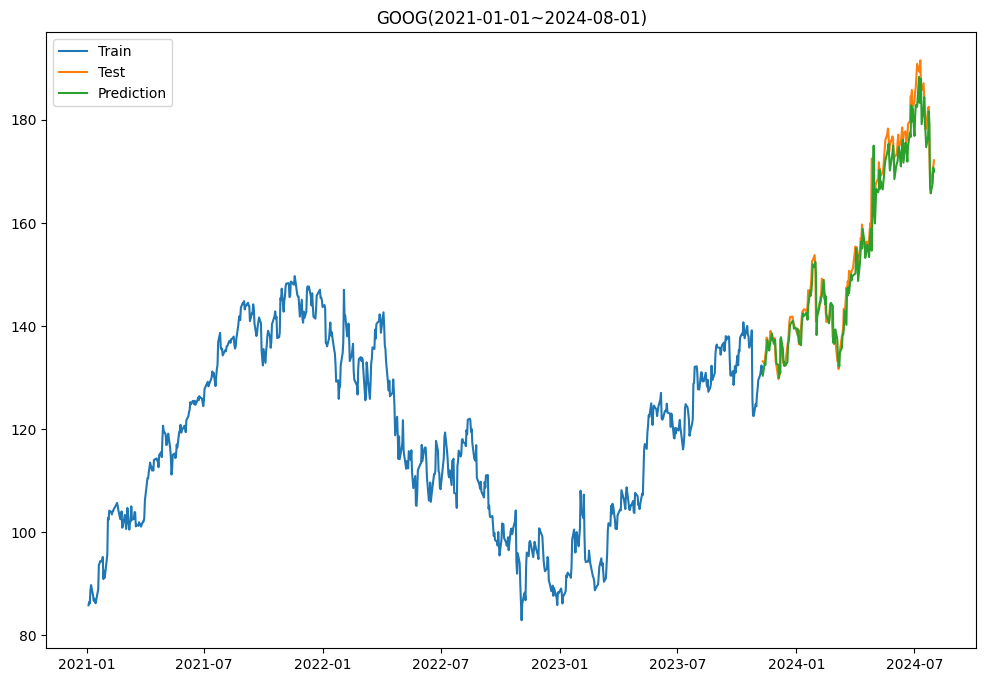

In [41]:
plt.figure(figsize=(12,8))
plt.plot(stock_train_vis['Close'], label = 'Train')
plt.plot(stock_test_vis['Close'], label = 'Test')
plt.plot(stock_test_vis['Predictions'], label = 'Prediction')
plt.legend()
plt.title(name + '('+start_day+'~'+end_day+')')